In [22]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [23]:
# read MosAIC metadata 
MosAIC = pd.read_csv("September_MosAIC_LSTM_UW_Metadata_LB2.csv")
MosAIC


,internal_id,seq_run,seq_sumission_date,data_return_date,internal_date_isolate_received,source_lab,isolation_date,sample_location,sample_location_lat,sample_location_lon,...,gtdb_species,fastani_reference,fastani_ani,fastani_af,SR_accession_no,ER_accession_no,fastani_ani.1,fastani_af.1,SR_accession_no.1,ER_accession_no.1
0,USHLN06,UW-1,29-Sep-21,01-Nov-21,06-May-21,Brackney_Doug,08-Jun-18,"New_Haven,CT,USA;North_America",41.316307,-72.922585,...,Klebsiella variicola,GCF_000828055.2,99.26,0.95,NaN,NaN,99.26,0.95,NaN,NaN
1,USHLN08,UW-1,29-Sep-21,01-Nov-21,06-May-21,Brackney_Doug,13-Jun-18,"New_Haven,CT,USA;North_America",41.316307,-72.922585,...,Serratia nevei,GCF_016742975.1,98.81,0.88,NaN,NaN,98.81,0.88,NaN,NaN
2,USHLN005,UW-2,07-Jul-22,19-Aug-22,06-May-21,Brackney_Doug,16-Jun-18,"New_Haven,CT,USA;North_America",41.316307,-72.922585,...,Cedecea sp000277545,GCF_000277545.1,99.98,0.97,NaN,NaN,99.98,0.97,NaN,NaN
3,USHLN16,UW-1,29-Sep-21,01-Nov-21,06-May-21,Brackney_Doug,17-Jun-18,"New_Haven,CT,USA;North_America",41.316307,-72.922585,...,Klebsiella michiganensis,GCF_002925905.1,98.52,0.89,NaN,NaN,98.52,0.89,NaN,NaN
4,USHLN010,UW-3,23-Aug-22,09-Sep-22,06-May-21,Brackney_Doug,17-Jun-18,"New_Haven,CT,USA;North_America",41.316307,-72.922585,...,Rouxiella badensis,GCF_002093665.1,99.65,0.98,NaN,NaN,99.65,0.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,USHLN35,UW-1,29-Sep-21,01-Nov-21,13-Jul-21,Xu_Jiannong,Jul-16,"St_Augustine,FL,USA;North_America",29.895568,-81.313,...,Pantoea ananatis,GCF_000710035.2,99.02,0.91,NaN,NaN,99.02,0.91,NaN,NaN
417,USHLN028,UW-2,07-Jul-22,19-Aug-22,13-Jul-21,Xu_Jiannong,Jul-16,"St_Augustine,FL,USA;North_America","Collected from one of six sites (lat, lon): (1...",NaN,...,Lysinibacillus fusiformis,GCF_003049525.1,97.20,0.93,NaN,NaN,97.20,0.93,NaN,NaN
418,USHLN029,UW-2,07-Jul-22,19-Aug-22,13-Jul-21,Xu_Jiannong,Jul-16,"St_Augustine,FL,USA;North_America","Collected from one of six sites (lat, lon): (1...",NaN,...,Lysinibacillus fusiformis,GCF_003049525.1,96.85,0.92,NaN,NaN,96.85,0.92,NaN,NaN
419,USHLN031,UW-2,07-Jul-22,FAILED,13-Jul-21,Xu_Jiannong,Jul-16,"St_Augustine,FL,USA;North_America","Collected from one of six sites (lat, lon): (1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
MosAIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   internal_id                     421 non-null    object 
 1   seq_run                         421 non-null    object 
 2   seq_sumission_date              373 non-null    object 
 3   data_return_date                421 non-null    object 
 4   internal_date_isolate_received  155 non-null    object 
 5   source_lab                      421 non-null    object 
 6   isolation_date                  421 non-null    object 
 7   sample_location                 421 non-null    object 
 8   sample_location_lat             421 non-null    object 
 9   sample_location_lon             412 non-null    object 
 10  sample_source                   421 non-null    object 
 11  lab_field_derived               421 non-null    object 
 12  host_species_non_mosquito       13 n

In [35]:
# get column names 
MosAIC.columns

Index(['internal_id', 'seq_run', 'seq_sumission_date', 'data_return_date',
       'internal_date_isolate_received', 'source_lab', 'isolation_date',
       'sample_location', 'sample_location_lat', 'sample_location_lon',
       'sample_source', 'lab_field_derived', 'host_species_non_mosquito',
       'life_stage_non_mosquito', 'sex_non_mosquito', 'tissue_non_mosquito',
       'mosquito_species', 'mosquito_strain_lab', 'mosquito_life_stage',
       'mosquito_sex', 'mosquito_female_feeding_status', 'mosquito_tissue',
       'confirmed_growth_media', 'confirmed_growth_temp', 'qc_pass',
       'completeness', 'contamination', 'genome_size_bp', 'number_contigs',
       'mean_contig_length_bp', 'longest_contig_bp', 'gc',
       'number_predicted_genes', 'n50', 'total_reads', 'avg_coverage',
       'gtdb_domain', 'gtdb_parent', 'gtbd_class', 'gtdb_order', 'gtdb_family',
       'gtdb_genus', 'gtdb_species', 'fastani_reference', 'fastani_ani',
       'fastani_af', 'SR_accession_no', 'ER_accessio

In [38]:
# get information 
MosAIC.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Columns: 52 entries, internal_id to ER_accession_no.1
dtypes: float64(19), object(33)
memory usage: 171.2+ KB


In [59]:
# overall shape of raw and QC'd data
'''
421 samples overall, 52 columns 
392 samples passing qc, 52 columns

'''

print(MosAIC.shape)
print(MosAIC[MosAIC['qc_pass'] == "Pass"].shape) # boolean mask to filter

# make a df with just passed qc samples 
MosAIC_filt = MosAIC[MosAIC['qc_pass'] == "Pass"]


(421, 52)
(392, 52)


AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

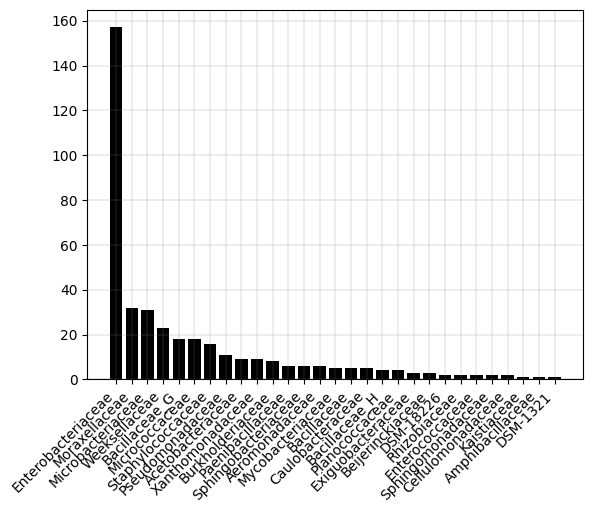

In [84]:
# most dominant taxa in the collection (by family)
dominant_family = MosAIC_filt[['gtdb_family', 'internal_id']].groupby(['gtdb_family']).agg('count').sort_values('internal_id', ascending= False).reset_index()
dominant_family
# plot this 
plt.bar(x = dominant_family['gtdb_family'], height=dominant_family['internal_id'], color = 'black')
plt.xticks(rotation = 45, ha = "right")
plt.grid(color = 'gray', linestyle = '-', linewidth = 0.2)
plt.tick_params(axis='both', colors='black', labelsize=10)